In [1]:
# pyplot_brokenAxisSubplot.jl
#
#   Demonstrate use of broken axis subplot
#
# Ian Butterworth (https://gist.github.com/ianshmean)
# Julia 1.1.0
# 13.05.2019
# Last Edit: 13.05.2019

# Reference: https://gist.github.com/gizmaa/7214002#gistcomment-2831191

using PyPlot, PyCall
axes_grid1 = pyimport("mpl_toolkits.axes_grid1")
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

###################
##  Create Data  ##
###################
x = rand(100)
y = rand(100)
y2 = rand(100).+10;

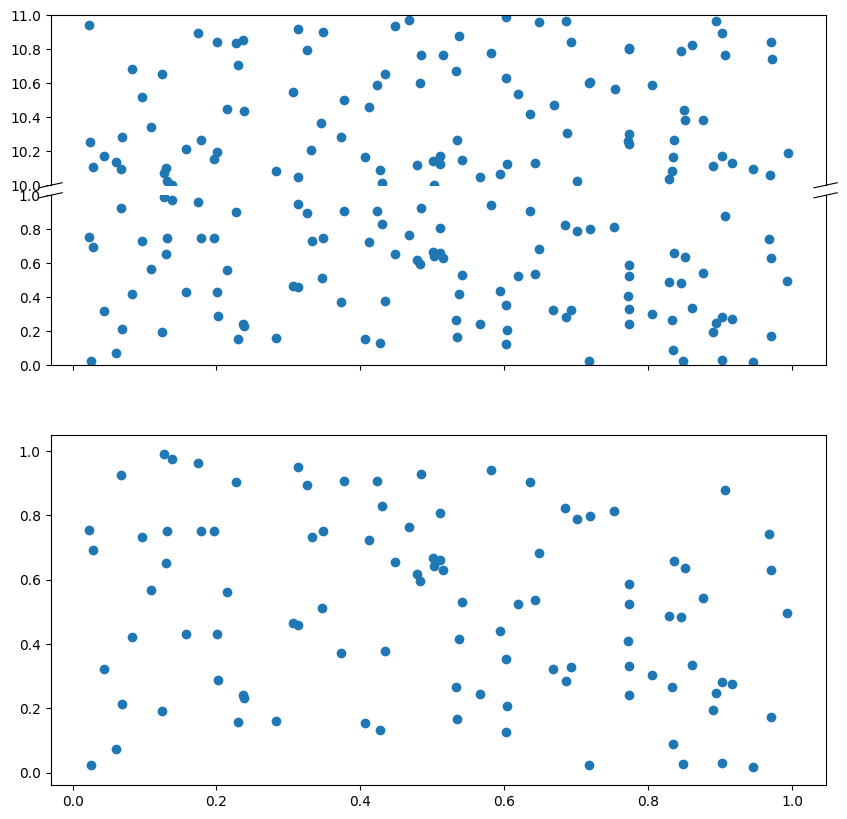

In [2]:
##########################
##  First (Upper) Plot  ##
##########################
fig = figure("pyplot_brokenAxisSubplot",figsize=(10,10))
axes = fig.subplots(nrows=2, sharex=true)

ax = axes[1]
divider = axes_grid1.make_axes_locatable(ax)
ax2 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax2)

# Lower Portion of First Plot
ax.scatter(x, y)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(false)

# Upper Portion of First Plot
ax2.scatter(x, y2)
ax2.set_ylim(10, 11)
ax2.tick_params(bottom="off", labelbottom="off")
ax2.spines["bottom"].set_visible(false)

###############################
##  Add Line Break Markings  ##
###############################
# From https://matplotlib.org/examples/pylab_examples/broken_axis.html

# Upper Line Break Markings
d = 0.015  # how big to make the diagonal lines in axes coordinates
ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color="k", clip_on=false,linewidth=0.8)        # Left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), transform=ax2.transAxes, color="k", clip_on=false,linewidth=0.8)  # Right diagonal

# Lower Line Break Markings
ax.plot((-d, +d), (1 - d, 1 + d), transform=ax.transAxes, color="k", clip_on=false,linewidth=0.8)  # Left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), transform=ax.transAxes, color="k", clip_on=false,linewidth=0.8)  # Right diagonal

###################
##  Second Plot  ##
###################
axes[2].scatter(x, y)

gcf() # Needed for IJulia to plot inline